In [1]:
# Import packs
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
# import tensorflow as tf

%matplotlib inline  

print ("Packs loaded")

Packs loaded


In [2]:
# Print Current Folder 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) ) 

# Useful function
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

Current folder is /Users/len/JupyterNotebook


In [3]:
test_image = imread("/Users/len/Pictures/KakaoTalk_Photo_2018-08-23-16-50-00.jpeg")
print_typeshape(test_image)

Type is <class 'numpy.ndarray'>
Shape is (3024, 3024, 3)


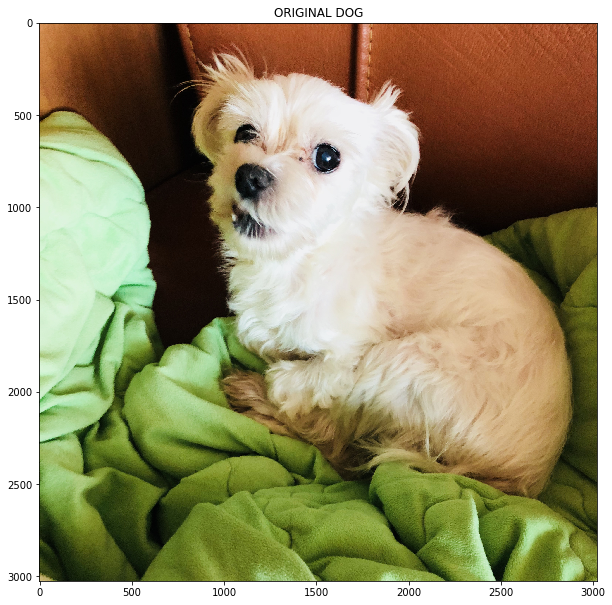

In [6]:
plt.figure(figsize=(10, 11))
plt.imshow(test_image)
plt.title("ORIGINAL DOG")
plt.draw()

불러올 때 타입도 정할 수 있다.

In [8]:
test_image

array([[[214, 149,  95],
        [214, 149,  95],
        [213, 148,  92],
        ..., 
        [169,  85,  48],
        [163,  79,  42],
        [164,  80,  43]],

       [[214, 149,  95],
        [213, 148,  94],
        [211, 146,  90],
        ..., 
        [164,  80,  43],
        [160,  76,  39],
        [164,  80,  43]],

       [[215, 150,  96],
        [212, 147,  93],
        [209, 144,  88],
        ..., 
        [164,  80,  43],
        [163,  79,  42],
        [164,  80,  43]],

       ..., 
       [[201, 182, 123],
        [203, 184, 125],
        [205, 186, 127],
        ..., 
        [169, 185, 110],
        [171, 187, 112],
        [167, 183, 108]],

       [[202, 186, 127],
        [202, 186, 127],
        [203, 187, 128],
        ..., 
        [170, 186, 115],
        [172, 188, 117],
        [174, 190, 119]],

       [[203, 187, 128],
        [202, 186, 127],
        [203, 187, 128],
        ..., 
        [166, 181, 114],
        [170, 185, 116],
        [176, 191,

이번에는 타입을 변경했을 경우에 어떻게 되는지 살펴보자

In [16]:
test_image2 = imread("/Users/len/Pictures/KakaoTalk_Photo_2018-08-23-16-50-00.jpeg").astype(np.float)/255.
print_typeshape(test_image2)

Type is <class 'numpy.ndarray'>
Shape is (3024, 3024, 3)


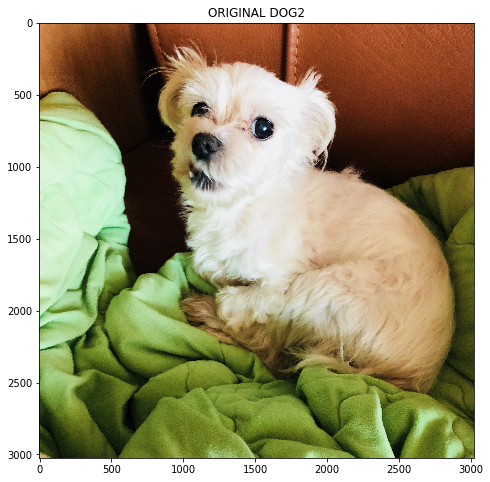

In [17]:
plt.figure(figsize=(10, 8))
plt.imshow(test_image2)
plt.title("ORIGINAL DOG2")
plt.draw()

## RESZIE

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


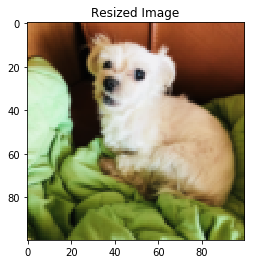

In [19]:
image_test = imresize(test_image, [100, 100])
print_typeshape(image_test)

plt.figure(1)
plt.imshow(image_test)
plt.title("Resized Image")
plt.draw()

## GRAYSCALE

In [20]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print("Current Image if GRAY!")
        return rgb

In [21]:
image2gray = rgb2gray(image_test)
print("size of image2gray %s" % (image2gray.shape,))
print("size of image2gray is", type(image2gray))


size of image2gray (100, 100)
size of image2gray is <class 'numpy.ndarray'>


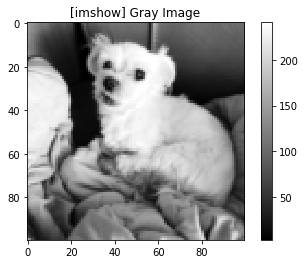

In [22]:
plt.imshow(image2gray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

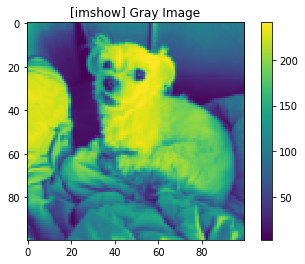

In [23]:
plt.imshow(image2gray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

## RESHAPE

모양을 바꾸는 것

In [25]:
# MATRIX TO VECTOR
imagerowvec = np.reshape(image2gray, (1,-1));
print("size of imagerowvec is %s" % (imagerowvec.shape,))
print("type of imagerowvec is", type(imagerowvec))

size of imagerowvec is (1, 10000)
type of imagerowvec is <class 'numpy.ndarray'>


In [26]:
# VECTOR TO MATRIX
imagematrix = np.reshape(imagerowvec, (100, -1));
print("size of imagematrix is %s" % (imagematrix.shape,))
print("type of imagematrix is", type(imagematrix))

size of imagematrix is (100, 100)
type of imagematrix is <class 'numpy.ndarray'>


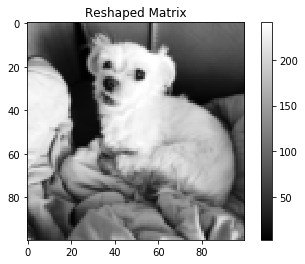

In [27]:
plt.imshow(imagematrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

LOAD FORM FOLDER

In [29]:
cwd = os.getcwd()
path = cwd + "/img/"
flist = os.listdir(path)
print("[%d] FILES ARE IN [%s]" % (len(flist), path))

[6] FILES ARE IN [/Users/len/JupyterNotebook/img/]


In [30]:
for i, f in enumerate(flist):
    print("[%d] TH FILE IS [%s]" % (i, f))

[0] TH FILE IS [gplus-522195145.jpg]
[1] TH FILE IS [KakaoTalk_Photo_2018-08-23-16-50-00.jpeg]
[2] TH FILE IS [gplus-1026697330.jpg]
[3] TH FILE IS [gplus1705389348.jpg]
[4] TH FILE IS [gplus5852800594700474993.jpg]
[5] TH FILE IS [gplus941079255.jpg]


LOAD IMAGES WITH APPROPRIATE EXTENSIONS

In [33]:
valid_exts = [".jpg", ".gif", ".png", ".tga", "jpeg"]
imgs = []
names = []
for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0])
    
names

['gplus-522195145',
 'gplus-1026697330',
 'gplus1705389348',
 'gplus5852800594700474993',
 'gplus941079255']

PLOT LOADED IMAGES

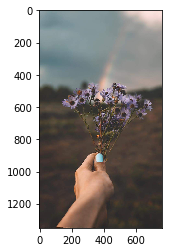

In [34]:
for img, name in zip(imgs, names):
    plt.imshow(img)